Train the linear regression model and predict value, finally compare with groud truth test data.

In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns

In [2]:
dirty_training_set = pd.read_csv('../input/train.csv')
print(dirty_training_set.shape)
dirty_training_set.head()

(700, 2)


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<AxesSubplot:xlabel='x', ylabel='y'>

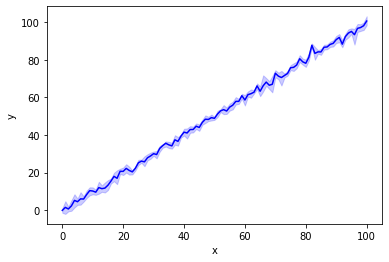

In [3]:
sns.lineplot(x='x', y='y',data=dirty_training_set, color='blue')

In [4]:
dirty_test_set = pd.read_csv('../input/test.csv')
print(dirty_test_set.shape)
dirty_test_set.head()

(300, 2)


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


<AxesSubplot:xlabel='x', ylabel='y'>

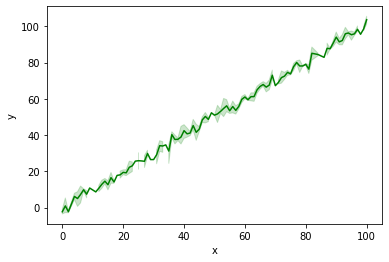

In [5]:
sns.lineplot(x='x', y='y',data=dirty_test_set, color='green')

Nan removal

In [6]:
training_set = dirty_training_set.dropna() 
print(training_set.shape)
test_set = dirty_test_set.dropna()
print(test_set.shape)

(699, 2)
(300, 2)


In [7]:
print (training_set.loc[0:5]['y'])
print (training_set.loc[0:5]['x'])

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64


In [8]:
training_set.describe().round()

,x,y
count,699.0,699.0
mean,50.0,50.0
std,29.0,29.0
min,0.0,-4.0
25%,25.0,25.0
50%,49.0,49.0
75%,75.0,75.0
max,100.0,109.0


In [9]:
x_training_set = training_set['x'].to_numpy()
y_training_set = training_set['y'].to_numpy()


x_test_set = test_set['x'].to_numpy()
y_test_set = test_set['y'].to_numpy()

# Review some of the statistics to check whether the data is skewed
print ("Mean of X Training set: ", np.mean(x_training_set), "\n")
print ("Median of X Training set: ", np.median(x_training_set), "\n")
print ("Mean of Y Training set: ", np.mean(y_training_set), "\n")
print ("Median of Y Training set: ", np.median(y_training_set), "\n")
print ("Std Dev of X Training set: ", np.std(x_training_set), "\n")
print ("Std Dev of Y Training set: ", np.std(y_training_set), "\n")

Mean of X Training set:  50.01430615164521 

Median of X Training set:  49.0 

Mean of Y Training set:  49.939869170457804 

Median of Y Training set:  48.97302037 

Std Dev of X Training set:  28.933841385275375 

Std Dev of Y Training set:  29.08838760426971 



Median and mean are similar so the training set isn't skewed by any outliers that might cause leverage when doing the linear regression

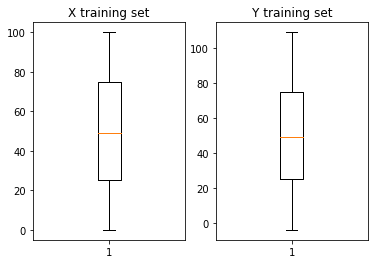

In [10]:
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_training_set)
plt.show()

Does really show very much but we are not really here for the data.  The data isn't normal and there doesn't seem to be any outliers to worry about.

In [11]:
# Now to set up the linear regression model
# Create linear regression object
from sklearn import linear_model
x_training_set = x_training_set.reshape(-1, 1)
y_training_set = y_training_set.reshape(-1, 1)

lm = linear_model.LinearRegression()
# ... then fir it
lm.fit(x_training_set,y_training_set)

# Have a look at R sq to give an idea of the fit 
print('R sq: ',lm.score(x_training_set,y_training_set))#Return the coefficient of determination of the prediction.

# and so the correlation is..
print('Correlation: ', math.sqrt(lm.score(x_training_set,y_training_set)))


R sq:  0.9907015319025518
Correlation:  0.9953399077212527


Now that's what I call a good R sq and correlation!!! The positive correlation shows that as Y increases
so does X.

In [12]:
# This the coefficient for the single feature
print("Coefficient for X ", lm.coef_)

# Get the standard error
print ("Standard Error: ",st.sem(x_training_set))
# Our hypothesis test for this is that there is no difference between the coefficient and the true value
# that the coefficient should be
ttest = lm.coef_/st.sem(x_training_set)
print ("The t-statistic:",ttest)

# but we need the p-value to help determine the probablity that we have a correct t-statistic
print ("Two tailed p-values: ")
st.pearsonr(np.squeeze(x_training_set), np.squeeze(y_training_set))


Coefficient for X  [[1.00065638]]
Standard Error:  [1.09516205]
The t-statistic: [[0.91370623]]
Two tailed p-values: 


(0.9953399077212528, 0.0)

Although we haven't a normal distribution I have done these calculations - just because.

In [13]:
# This the F-statistic that shows whether there is a relationship between the response and the predictors
# I couldn't find a function for this so I have done the calcs by hand
# First get the total sum of the squares.
TSS = y_training_set
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)

# This calculates the residual sum of the squares
y_predicted = lm.predict(x_training_set)   # These are predicted values of Y
y_variance = y_training_set - y_predicted # These are the residuals bewteen actual values of Y and the predcitions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)

# As we only have one feature the f-statistic formula = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)





The F-statistic is:   295202.8690868274


Which is pretty huge so I think we can safely say there is a relationship. As we've got a pretty good
model let's run it against the test set.

In [14]:
# So let's run the model against the test data
y_predicted = lm.predict(x_test_set.reshape(-1,1))
print(len(np.squeeze(y_predicted)))
print(len(np.squeeze(y_test_set)))

300
300


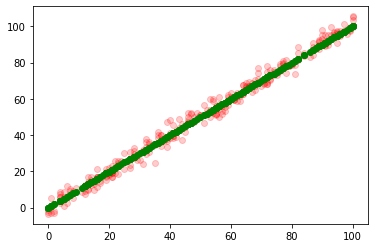

In [15]:
plt.scatter(x_test_set,y_test_set, color='red', alpha=0.2)
plt.scatter(x_test_set, y_predicted, color='green')
plt.show()

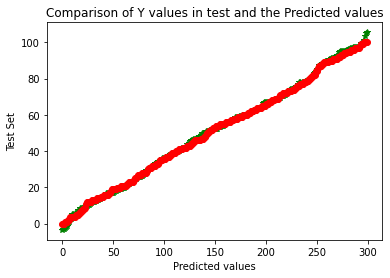

In [16]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
y_p = list(np.squeeze(y_predicted))
y_t = list(np.squeeze(y_test_set))
y_p.sort()
y_t.sort()
plt.plot(y_t, 'g*', y_p,  'ro')
plt.show()

As we expected it's a really good fit!!